# Librairie

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats import chi2_contingency

print("pandas version:" ,pd.__version__)
print("matplotlib version:" ,matplotlib.__version__)
print("seaborn version:" ,sns.__version__)
print("scipy versiion:" , scipy.__version__)

pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2
scipy versiion: 1.13.1


## Data

In [2]:
df= sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Types de variables et comprehension du dataset 

### variables discretes: 
- sex : le sexe du client (homme ou femme)

- smoker : le client est fumeur ou pas

- day : le jour de la semaine où le client est venu

- time : le type de repas, le matin (lunch) ou la soirée (le dinner)

- size : le nombre de place dont dispose la table du client 

### Variables continues :
- total_bill : le total des depenses effectuése par le client

- tip : le pourboire donner par le client


# chi2_contingency

H0: "il n'y a pas de relation entre le nombre de personnes (size) et le jour de la semaine (day) "

In [3]:
contingency_table=pd.crosstab(df["size"],df["day"])
contingency_table

day,Thur,Fri,Sat,Sun
size,,,,
1,1,1,2,0
2,48,16,53,39
3,4,1,18,15
4,5,1,13,18
5,1,0,1,3
6,3,0,0,1


In [16]:
chi2c_result=chi2_contingency(contingency_table)
chi2c_result

Chi2ContingencyResult(statistic=29.632849936919712, pvalue=0.013316478351860587, dof=15, expected_freq=array([[ 1.01639344,  0.31147541,  1.42622951,  1.24590164],
       [39.63934426, 12.14754098, 55.62295082, 48.59016393],
       [ 9.6557377 ,  2.95901639, 13.54918033, 11.83606557],
       [ 9.40163934,  2.88114754, 13.19262295, 11.52459016],
       [ 1.2704918 ,  0.38934426,  1.78278689,  1.55737705],
       [ 1.01639344,  0.31147541,  1.42622951,  1.24590164]]))

In [12]:
pd.df["size"].sort_values().unique()

AttributeError: module 'pandas' has no attribute 'df'

In [17]:
 chi2c_result.expected_freq

array([[ 1.01639344,  0.31147541,  1.42622951,  1.24590164],
       [39.63934426, 12.14754098, 55.62295082, 48.59016393],
       [ 9.6557377 ,  2.95901639, 13.54918033, 11.83606557],
       [ 9.40163934,  2.88114754, 13.19262295, 11.52459016],
       [ 1.2704918 ,  0.38934426,  1.78278689,  1.55737705],
       [ 1.01639344,  0.31147541,  1.42622951,  1.24590164]])

In [24]:
pd.DataFrame(
    chi2c_result.expected_freq,
    columns=pd.Index(df["day"].sort_values().unique(), name="day"),
    index=pd.Index(df["size"].sort_values().unique(), name="size")
).round()


day,Thur,Fri,Sat,Sun
size,,,,
1,1.0,0.0,1.0,1.0
2,40.0,12.0,56.0,49.0
3,10.0,3.0,14.0,12.0
4,9.0,3.0,13.0,12.0
5,1.0,0.0,2.0,2.0
6,1.0,0.0,1.0,1.0


In [27]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=df["day"].sort_values().unique,
    index=df["size"].sort_values().unique()
    
).round()


TypeError: Index(...) must be called with a collection of some kind, <bound method Series.unique of 121    Thur
133    Thur
132    Thur
131    Thur
130    Thur
       ... 
158     Sun
157     Sun
156     Sun
186     Sun
0       Sun
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']> was passed

## En Résumé : 

In [19]:
p = 0.8
print(f"H0: \"il n'y a pas de relation entre le nombre de personnes (size) et le jour de la semaine (day) \"")

alpha = 0.02
p_value= chi2c_result.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")   


H0: "il n'y a pas de relation entre le nombre de personnes (size) et le jour de la semaine (day) "
nous avons suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.013316478351861


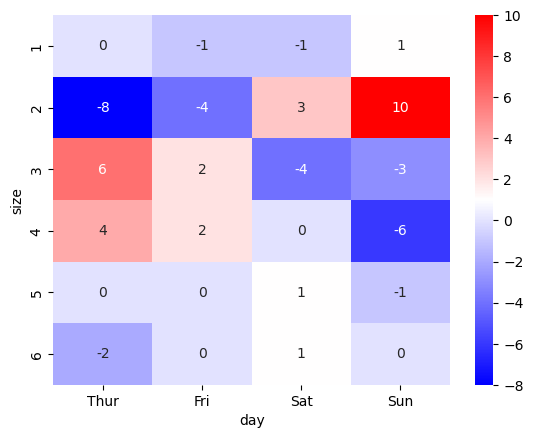

In [ ]:
diff= pd.DataFrame(
    chi2c_result.expected_freq,
    columns=pd.Index(df["day"].sort_values().unique(), name="day"),
    index=pd.Index(df["size"].sort_values().unique(), name="size")
).round() - contingency_table

sns.heatmap(diff,annot=True,cmap="bwr")
plt.show()
